In [1]:
import pandas as pd
import matplotlib.pyplot as mpl

from pandas import Series
file='E:\\Pre-Term\\assignment_2\\earthquake.csv'

df=pd.read_csv(file,sep=',',parse_dates=[['Date','Time']])

EQ123=pd.read_csv('E:\\Pre-Term\\assignment_2\\earthquake.csv',sep=',')
EQ123.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [2]:
def f(x):
     return Series(dict(Number_of_occurances = x['Type'].count()))


In [3]:
earthquakes=df[df['Type']=='Earthquake']['Status'].value_counts()
Explosion=df[df['Type']=='Explosion']['Status'].value_counts()
Nuclear_Explosion=df[df['Type']=='Nuclear Explosion']['Status'].value_counts()
Rock_Burst=df[df['Type']=='Rock Burst']['Status'].value_counts()
df1=pd.DataFrame([earthquakes,Explosion,Nuclear_Explosion,Rock_Burst])
df1.index = ['Earthquake','Explosion','Nuclear Explosion','Rock Burst']
df1.plot(kind='bar',stacked=True, figsize=(15,8))


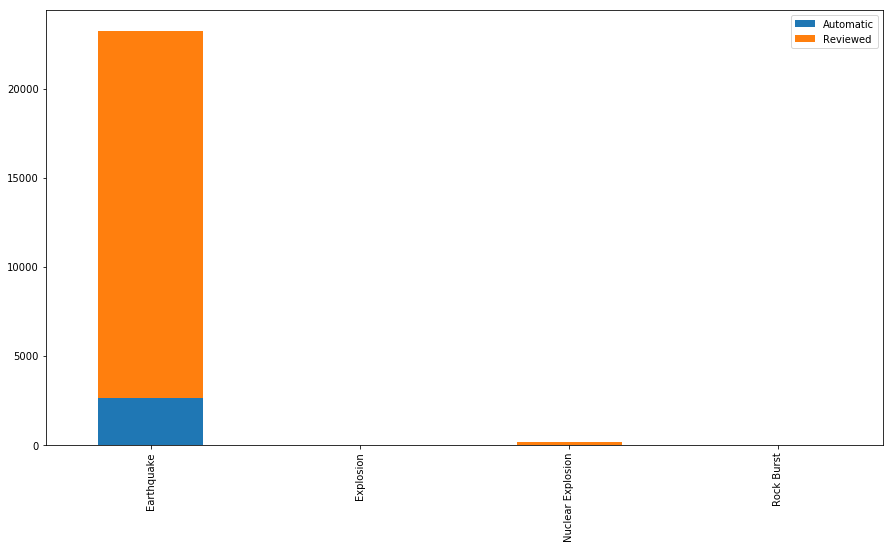

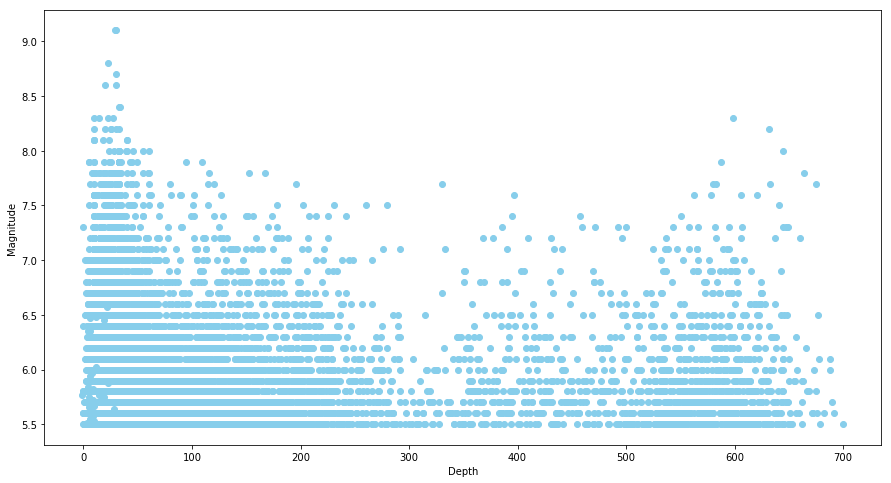

In [4]:
df_earth=df[df['Type']=='Earthquake']


mpl.figure(figsize=(15, 8))

mpl.scatter(df_earth['Depth'],df_earth['Magnitude'],color='skyblue')
mpl.xlabel('Depth')
mpl.ylabel('Magnitude')
mpl.show()


In [5]:


event_count1 = df.groupby(['Type','Source']).apply(f)
event_count1=event_count1.sort_values(['Number_of_occurances'],ascending=False)
event_count1.head()


Number_of_occurances
Type              Source                         
Earthquake        US                        20462
                  ISCGEM                     2460
Nuclear Explosion US                          163
Earthquake        ISCGEMSUP                   120
                  GCMT                         55

In [6]:
event_count2 = df.groupby(['Source','Location Source']).apply(f)
event_count2=event_count2.sort_values(['Number_of_occurances'],ascending=False)
event_count2


Number_of_occurances
Source    Location Source                      
US        US                              20343
ISCGEM    ISCGEM                           2460
ISCGEMSUP ISCGEM                            120
CI        CI                                 61
GCMT      GCMT                               55
NC        NC                                 51
US        GUC                                46
          AEIC                               40
          UNM                                21
          PGC                                19
          WEL                                18
          AGS                                17
          ISK                                15
          ATH                                14
          HVO                                12
AK        AK                                 12
US        SPE                                10
          ROM                                 7
          TEH                                 7
          AEI                                 7
          H                                   7
OFFICIAL  US                                  7
UW        UW                                  6
US        CASC                                4
          US_WEL                              4
NN        NN                                  4
US        NC                                  3
          THR                                 3
ATLAS     ATLAS                               3
US        RSPR                                3
          JMA                                 3
          THE                                 3
          TUL                                 2
          AK                                  2
          MDD                                 2
          B                                   2
          G                                   2
          CAR                                 1
          BEO                                 1
OFFICIAL  ISCGEM                              1
US        BOU                                 1
          UCR                                 1
          U                                   1
          BRK                                 1
          CSEM                                1
          AG                                  1
          TAP                                 1
          GCMT                                1
          SLC                                 1
          SJA                                 1
SE        SE                                  1
US        LIM                                 1
PR        PR                                  1
US        OTT                                 1

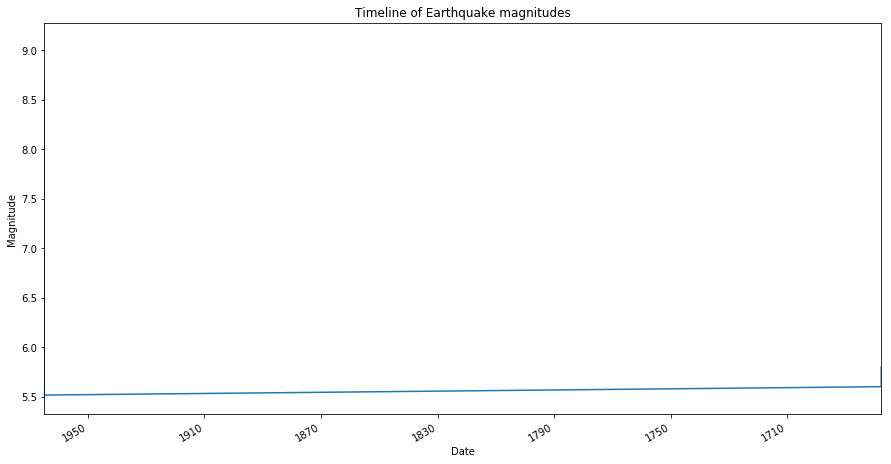

In [7]:
%matplotlib inline
df["Date_Time"] = pd.to_datetime(df["Date_Time"],errors='coerce')
df = df.set_index(['Date_Time'])



df_earth1=df[df['Type']=='Earthquake']
mpl.figure(figsize=(15, 8))
timeline_magnitude = df_earth1['Magnitude'].plot(kind='line')
timeline_magnitude.set_xlabel('Date')
timeline_magnitude.set_ylabel('Magnitude')
timeline_magnitude.set_title('Timeline of Earthquake magnitudes')
timeline_magnitude


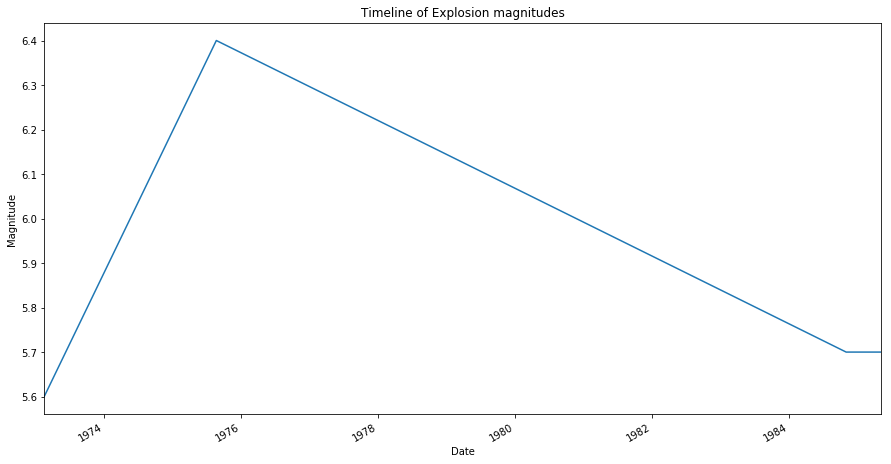

In [8]:
df_explosion=df[df['Type']=='Explosion']
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15, 8))
timeline_magnitude_exp = df_explosion['Magnitude'].plot(kind='line')
timeline_magnitude_exp.set_xlabel('Date')
timeline_magnitude_exp.set_ylabel('Magnitude')
timeline_magnitude_exp.set_title('Timeline of Explosion magnitudes')

timeline_magnitude_exp



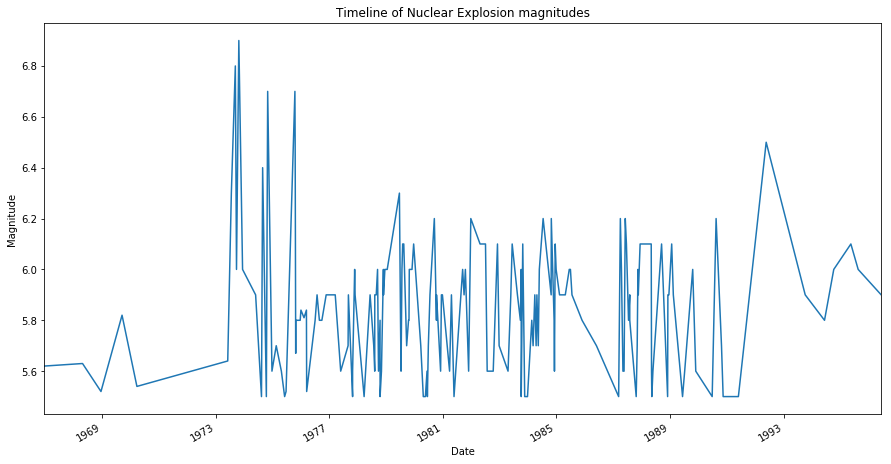

In [9]:
df_explosion_nucl=df[df['Type']=='Nuclear Explosion']
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15, 8))
timeline_magnitude_exp_nucl = df_explosion_nucl['Magnitude'].plot(kind='line')
timeline_magnitude_exp_nucl.set_xlabel('Date')
timeline_magnitude_exp_nucl.set_ylabel('Magnitude')
timeline_magnitude_exp_nucl.set_title('Timeline of Nuclear Explosion magnitudes')
timeline_magnitude_exp_nucl



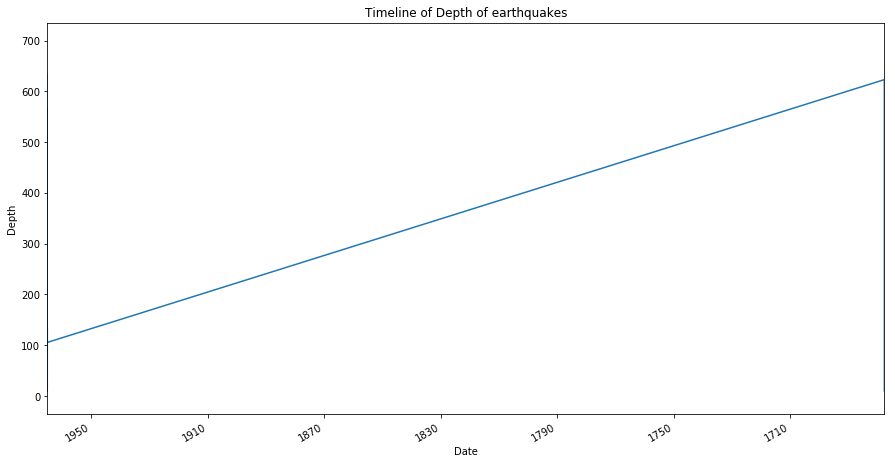

In [10]:
df_earth1_depth=df[df['Type']=='Earthquake']
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15, 8))
timeline_depth = df_earth1_depth['Depth'].plot(kind='line')

timeline_depth.set_xlabel('Date')
timeline_depth.set_ylabel('Depth')
timeline_depth.set_title('Timeline of Depth of earthquakes')

timeline_depth





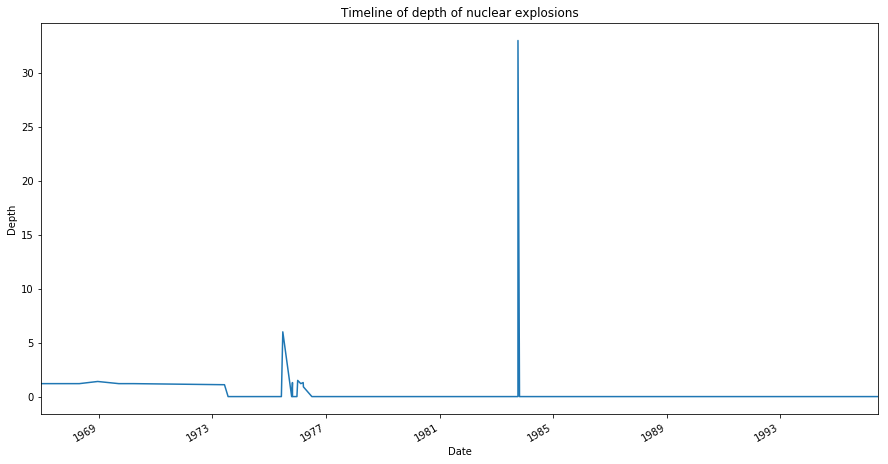

In [11]:
df_earth1_exp=df[df['Type']=='Nuclear Explosion']
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15, 8))
timeline_depth_exp_nuc = df_earth1_exp['Depth'].plot(kind='line')
timeline_depth_exp_nuc.set_xlabel('Date')
timeline_depth_exp_nuc.set_ylabel('Depth')
timeline_depth_exp_nuc.set_title('Timeline of depth of nuclear explosions')
timeline_depth_exp_nuc



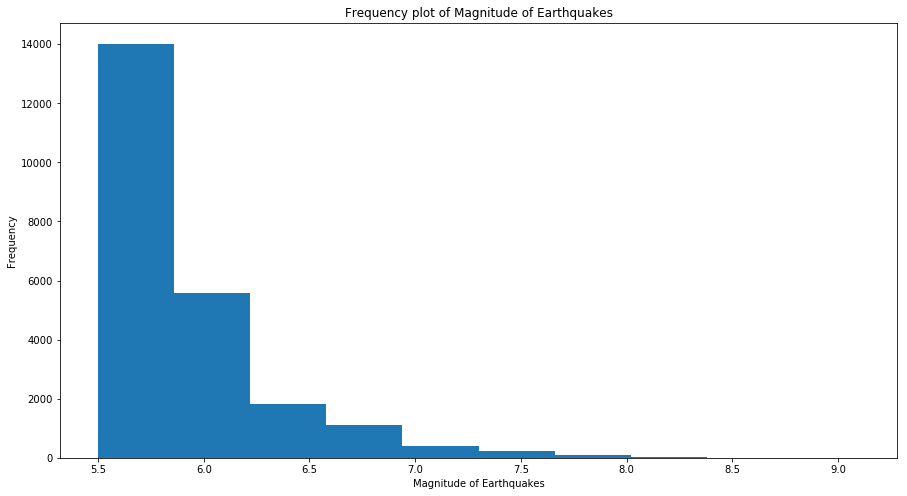

In [12]:
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15, 8))
mpl.hist(df[df['Type']=='Earthquake']['Magnitude'], normed=False, bins=10)
mpl.xlabel('Magnitude of Earthquakes');
mpl.ylabel('Frequency');
mpl.title('Frequency plot of Magnitude of Earthquakes')


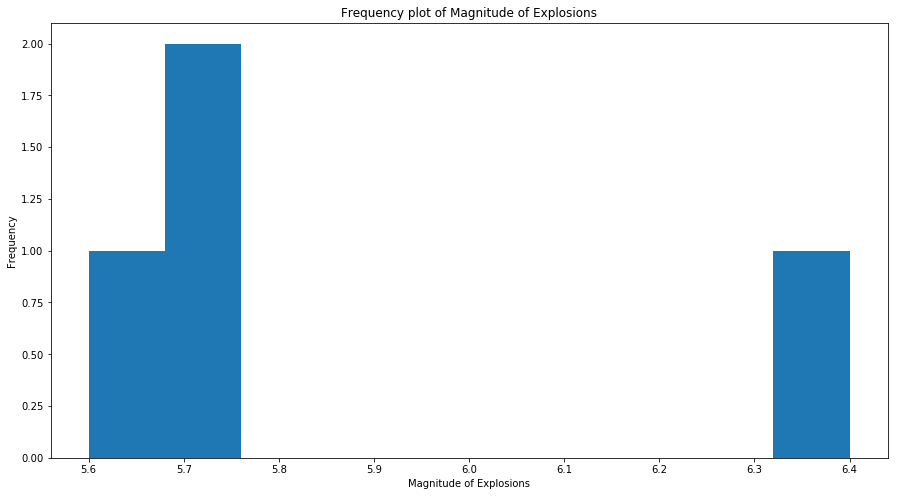

In [13]:
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15, 8))
mpl.hist(df[df['Type']=='Explosion']['Magnitude'], normed=False, bins=10)
mpl.xlabel('Magnitude of Explosions');
mpl.ylabel('Frequency');
mpl.title('Frequency plot of Magnitude of Explosions')



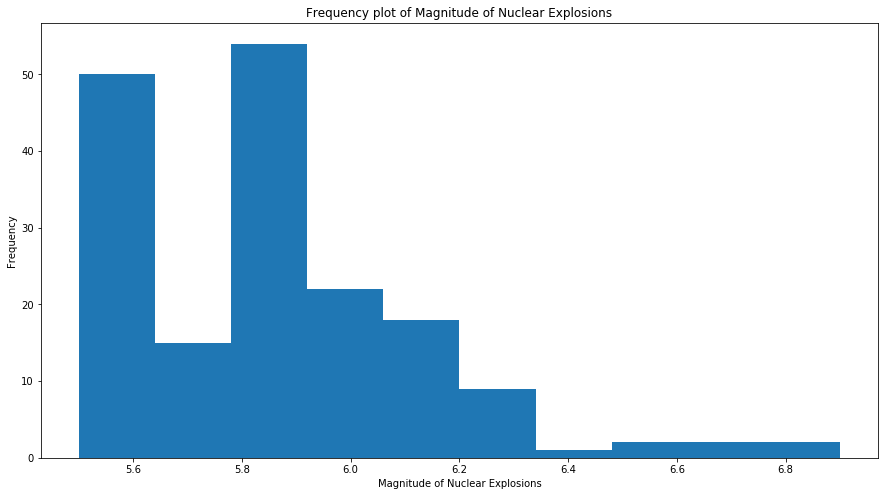

In [14]:
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15, 8))
mpl.hist(df[df['Type']=='Nuclear Explosion']['Magnitude'], normed=False, bins=10)
mpl.xlabel('Magnitude of Nuclear Explosions');
mpl.title('Frequency plot of Magnitude of Nuclear Explosions')
mpl.ylabel('Frequency');




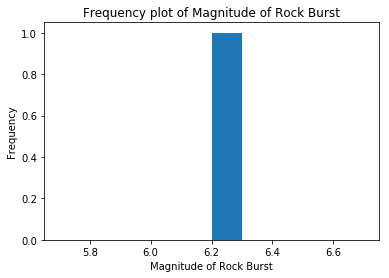

In [15]:
import matplotlib.pyplot as mpl
mpl.hist(df[df['Type']=='Rock Burst']['Magnitude'], normed=False, bins=10)
mpl.xlabel('Magnitude of Rock Burst');
mpl.title('Frequency plot of Magnitude of Rock Burst')
mpl.ylabel('Frequency');



In [16]:
from mpl_toolkits.basemap import Basemap
EQ=df
latitudes, longitudes = [], []


latitudes=EQ['Latitude']
longitudes=EQ['Longitude']
magnitudes=EQ['Magnitude']
depths=EQ['Depth']


# In[ ]:


import numpy as np

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=10, lon_0=50)
def get_marker_color(magnitude):
    if magnitude > 2.5 and magnitude < 6.0:
        return ('go')
    elif magnitude >= 6.0 and magnitude < 7.0:
        return ('yo')
    else:
        return ('ro')

def get_marker_color_depth(depth):
    if depth > 0 and depth < 200.0:
        return ('go')
    elif depth >= 200.0 and depth < 500.0:
        return ('yo')
    else:
        return ('ro')




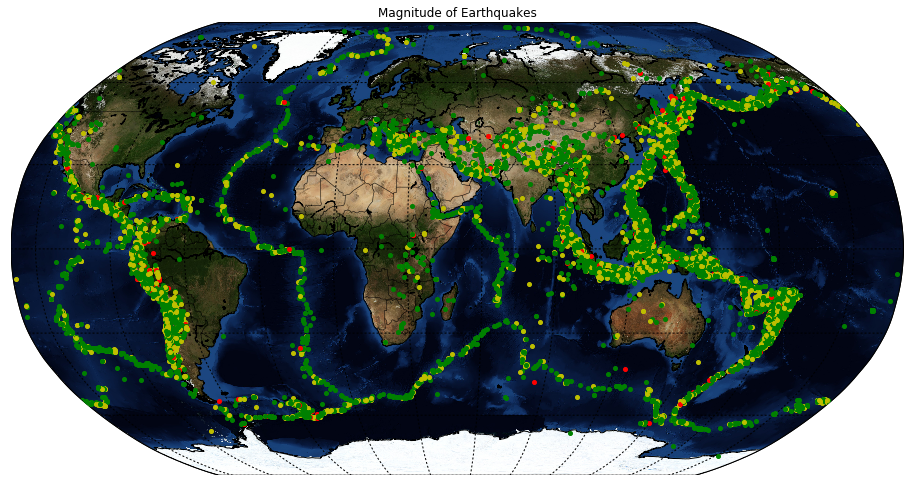

In [17]:
mpl.figure(figsize=(16,12))
eq_map.drawcoastlines()
eq_map.drawcountries()
#eq_map.fillcontinents(color = 'gray')
eq_map.bluemarble()
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))


for lon, lat, mag in zip(longitudes, latitudes, magnitudes):
    x,y = eq_map(lon, lat)
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=4)

mpl.title('Magnitude of Earthquakes')
mpl.show()



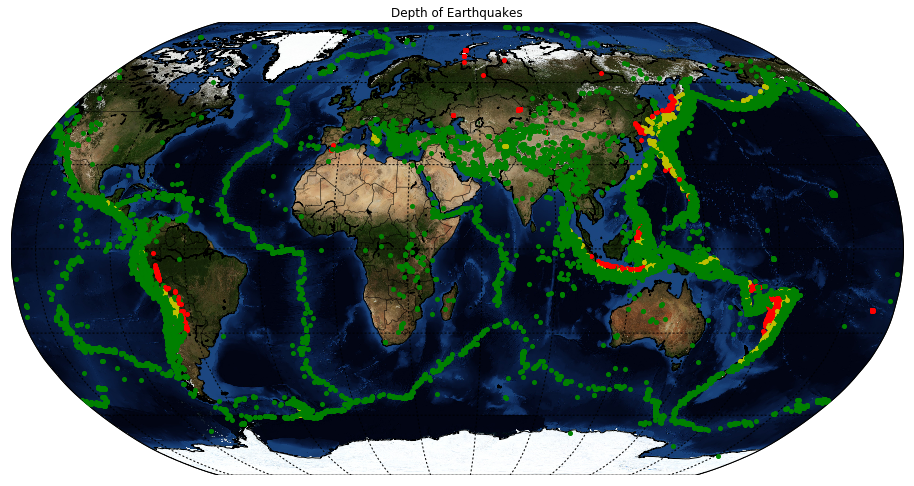

In [18]:

mpl.figure(figsize=(16,12))
eq_map.drawcoastlines()
eq_map.drawcountries()
#eq_map.fillcontinents(color = 'gray')
eq_map.bluemarble()
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))


for lon, lat, dep in zip(longitudes, latitudes, depths):
    x,y = eq_map(lon, lat)
    marker_string = get_marker_color_depth(dep)
    eq_map.plot(x, y, marker_string, markersize=4)

mpl.title('Depth of Earthquakes')

mpl.show()


In [19]:
earthquakesD=EQ123[EQ123['Type']=='Earthquake']['Date'].value_counts()
#ExplosionD=EQ[EQ['Type']=='Explosion']['Date'].value_counts()
#Nuclear_ExplosionD=EQ[EQ['Type']=='Nuclear Explosion']['Date'].value_counts()
#Rock_BurstD=EQ[EQ['Type']=='Rock Burst']['Date'].value_counts()
df1D=pd.DataFrame(earthquakesD)
df1D.index.names = ['Date']
df1D.columns=['#_of_Earthquakes']

df1D=df1D.sort_values(['#_of_Earthquakes'],ascending=False)
#The below dates have had the highest number of headaches in the given timeperiod
df1D.head()

,#_of_Earthquakes
Date,
03/11/2011,128
12/26/2004,51
02/27/2010,39
02/06/2013,27
11/15/2006,25


In [20]:
years=df.index.to_datetime().year
df.insert(19,'Year_of_occurance',years)
df.head()


,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year_of_occurance
Date_Time,,,,,,,,,,,,,,,,,,,,
1965-01-02 13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
1965-01-04 11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
1965-01-05 18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
1965-01-08 18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
1965-01-09 13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0


In [21]:
earthquakes=df[df['Type']=='Earthquake']
Explosion=df[df['Type']=='Explosion']
Nuclear_Explosion=df[df['Type']=='Nuclear Explosion']
Rock_Burst=df[df['Type']=='Rock Burst']

year_countE = earthquakes.groupby(['Year_of_occurance']).apply(f)


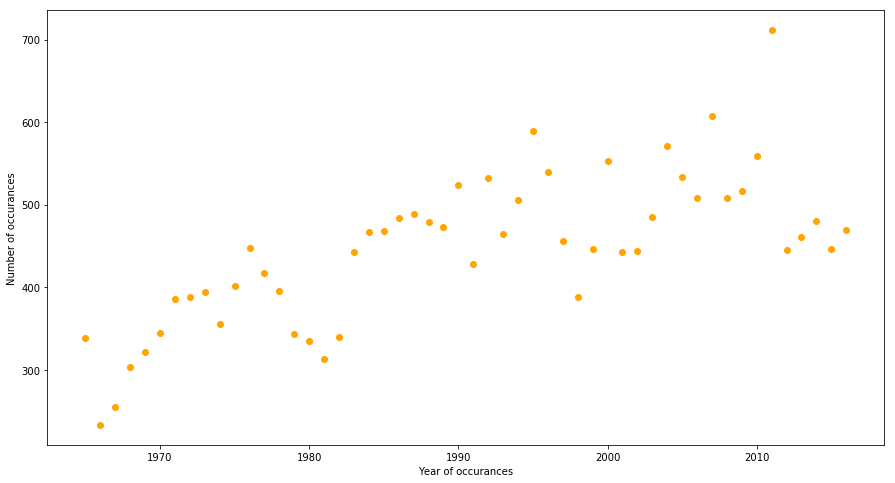

,Number_of_occurances
Year_of_occurance,
2011.0,712
2007.0,608
1995.0,589
2004.0,571
2010.0,559


In [22]:
mpl.figure(figsize=(15, 8))

mpl.scatter(year_countE.index,year_countE['Number_of_occurances'],color='orange')
mpl.ylabel('Number of occurances')
mpl.xlabel('Year of occurances')
mpl.show()
year_countE=year_countE.sort_values(['Number_of_occurances'],ascending=False)
year_countE.head()


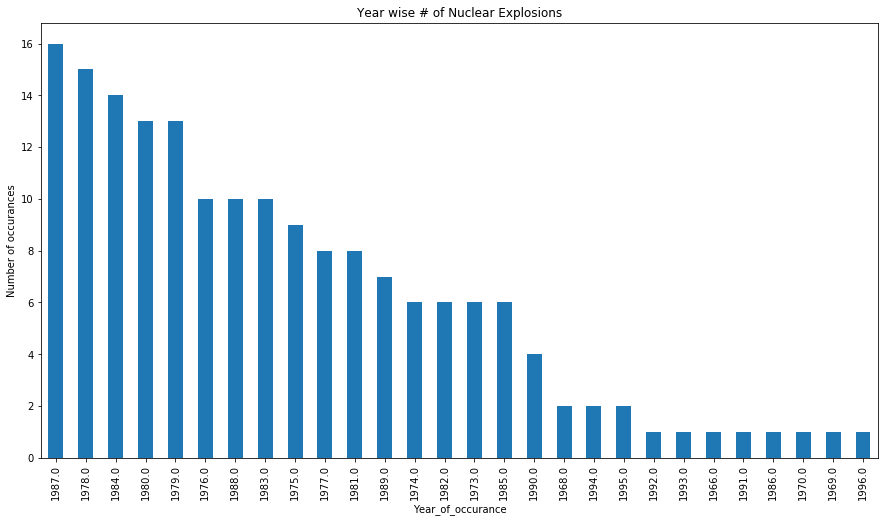

In [23]:
mpl.figure(figsize=(15, 8))
year_countNEx = Nuclear_Explosion.groupby(['Year_of_occurance']).apply(f)
year_countNEx=year_countNEx.sort_values(['Number_of_occurances'],ascending=False)
year_countNEx['Number_of_occurances'].plot(kind='bar')
mpl.ylabel('Number of occurances')
mpl.title('Year wise # of Nuclear Explosions')

